In [56]:
legit = [
    'Apple SD Gothic Neo',
    'Menlo',
    'Heiti TC',
    'Geneva',
    'Hiragino Sans GB',
    'Helvetica Neue',
    '.SF NS Mono',
    'Hiragino Sans',
    'PingFang HK',
    'Noteworthy',
    'Hiragino Sans',
    'Optima',
    'Avenir Next Condensed',
    'Lucida Grande',
    'Courier',
]

In [149]:
from glob import iglob
from PIL import Image, ImageDraw, ImageFont
from fnmatch import fnmatch

pangram = "Pack my box with five dozen liquor jugs."

fonts = []

for fn in sorted(iglob("/System/Library/Fonts/*.tt*")):
    if not fnmatch(fn, "*.tt[cf]"):
        continue
    for i in range(5):
        try:
            for size in range(10, 15):
                font = ImageFont.truetype(font=fn, size=15, index=i)
                if font.getname()[0] == 'Courier' and i > 0:
                    break
                if font.getname()[0] in legit:
                    fonts.append(font)
                else:
                    pass
        except:
            break
            
fonts = fonts

In [150]:
texts = [
    str(font.getname()) + '1 2 3 4 5 6 7 8 9'
    for font in fonts
]

size = [0, 0]
for font, txt in zip(fonts, texts):
    try:
        s = font.getsize(txt)
    except OSError:
        s = (0, 0)
    size = [max(size[0], s[0]), size[1] + s[1]]
#

img = Image.new("L", size, 255)
draw = ImageDraw.Draw(img)
y = 0
for font, txt in zip(fonts, texts):
    draw.text((0, y), txt, font=font, fill=0)
    try:
        y += font.getsize(txt)[1]
    except:
        pass
# img.show()
del draw

(<matplotlib.image.AxesImage at 0x2d75a1460>, 4)

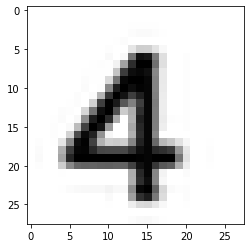

In [180]:
import random
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont

class ImageGenerator:
    def __init__(
        self,
        fonts,
        output_size=(28, 28),
        symbols = '123456789'
    ):
        self.fonts = fonts
        self.output_size = output_size
        self.symbols = symbols
        
    def add_margin(self, pil_img, top, right, bottom, left, color):
        width, height = pil_img.size
        new_width = width + right + left
        new_height = height + top + bottom
        result = Image.new(mode=pil_img.mode, size = (new_width, new_height), color=color)
        result.paste(pil_img, (left, top))
        return result
    
    def expand2square(self, pil_img, background_color):
        width, height = pil_img.size
        if width == height:
            return pil_img
        elif width > height:
            result = Image.new(pil_img.mode, (width, width), background_color)
            result.paste(pil_img, (0, (width - height) // 2))
            return result
        else:
            result = Image.new(pil_img.mode, (height, height), background_color)
            result.paste(pil_img, ((height - width) // 2, 0))
            return result
    
    def generate_one(self):
        font = random.choice(self.fonts)
        symbol = random.choice(list(self.symbols))
        size = font.getsize(symbol)
        
        img = Image.new("L", size, 255)
        draw = ImageDraw.Draw(img)
        draw.text((0, 0), symbol, font=font, fill=random.randint(0, 100))
        min_shift = 0
        max_shift = 3
        img = self.add_margin(
            img,
            random.randint(min_shift, max_shift),
            random.randint(min_shift, max_shift),
            random.randint(min_shift, max_shift),
            random.randint(min_shift, max_shift),
            255,
        )
        img = self.expand2square(img, 255)
        img = img.resize((28, 28), Image.ANTIALIAS)
        return img, int(symbol)

g = ImageGenerator(fonts) 
img, nb = g.generate_one()
plt.imshow(img, cmap='gray', vmin=0, vmax=255), nb